# Lesson 7 - Parkinson PCR
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

### Description:

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

#### Instructions:

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

In [2]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [116]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

import warnings

warnings.filterwarnings("ignore") # To suppress warning

%matplotlib inline

In [117]:
parkinsons_df = pd.read_csv(filename)
parkinsons_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [118]:
parkinsons_df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [119]:
# Define the target and features:
target_label = 'total_UPDRS'
non_features = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS']
feature_labels = [x for x in parkinsons_df.columns if x not in [target_label] + non_features]

# Filter out non-features and non-targets
parkinsons_df = parkinsons_df.drop(non_features, axis=1)

# One-hot encode inputs
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(parkinsons_expanded.shape))

# Get target and original x-matrix
y = parkinsons_df[target_label]
X = parkinsons_df.as_matrix(columns=feature_labels)

DataFrame one-hot-expanded shape: (5875, 17)


In [120]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [121]:
# Scale all columns first

# Create x-scaled (look into the function np.apply_along_axis to apply 'scale' function
#    to each column).
x_scaled =  np.apply_along_axis(scale, 1, X)

# Create a scaled y-target.
y_scaled = scale(y)

In [122]:
# PCR!!
pca = PCA(n_components=x_scaled.shape[1])
pca_result = pca.fit_transform(x_scaled)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

In [123]:
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,total_UPDRS
0,-0.045088,0.021846,-0.011965,0.002224,-0.003324,-0.000952,-0.001371,0.000894,0.000743,-0.000064,0.000037,-0.000069,-0.000018,-9.254165e-08,-4.101552e-07,1.480556e-15,0.502745
1,-0.064457,0.036847,-0.017445,-0.003462,-0.006028,-0.001887,0.000433,0.000536,0.000411,0.000058,0.000113,0.000058,0.000017,-8.425380e-08,3.734431e-07,2.175479e-15,0.549103
2,-0.052680,0.020125,-0.004610,0.001911,-0.014712,-0.000134,-0.000101,0.000922,-0.000104,0.000088,-0.000167,-0.000078,0.000031,1.518409e-07,-3.843817e-07,2.306288e-15,0.595367
3,-0.033055,0.017032,-0.013254,0.013447,-0.025724,0.002620,-0.001050,0.001790,-0.001052,-0.000038,-0.001359,-0.000215,-0.000030,1.039336e-06,-3.562540e-07,2.302477e-15,0.634716
4,-0.060086,0.027857,-0.010304,0.000267,-0.014814,0.000494,0.000529,0.000657,-0.000013,0.000212,-0.000077,-0.000039,0.000048,2.201413e-07,2.117552e-08,2.434191e-15,0.687522


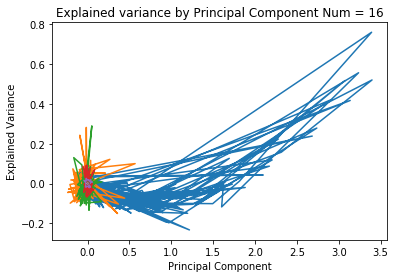

Explained Variance: 
[3.47834662e-02 1.20302807e-03 6.70121366e-04 2.72446869e-04
 1.97675170e-04 8.11822128e-05 1.68296588e-05 1.51410636e-05
 4.70752702e-06 1.80571521e-06 7.76025353e-07 1.71546249e-07
 5.86072793e-08 1.51846603e-11 3.30694608e-13 5.04738438e-30]
Component Direction: 
[[-1.49934592e-01 -1.76979481e-01 -1.62974924e-01 -1.57366235e-01
  -1.34695129e-01 -6.50672166e-02  8.05487599e-01 -1.24307118e-01
  -1.03124992e-01 -9.89139645e-02 -1.86927844e-02  1.49524933e-01
  -2.68162078e-01  2.37910936e-01  1.54530227e-01  1.12764819e-01]
 [ 1.12833541e-01  9.49335666e-02  1.04609509e-01  1.12217478e-01
   1.24040474e-01  1.04531311e-01  9.89510503e-02  9.66205723e-02
   1.02387286e-01  8.25721521e-02  1.00068377e-01  4.46739808e-01
  -5.80938115e-01 -4.05603530e-01 -3.41644592e-01 -2.52318888e-01]
 [ 1.16463305e-02 -2.05280345e-02 -3.01164530e-03  1.16094277e-03
   3.23961731e-02 -7.32350708e-02 -4.86987488e-01 -4.96920472e-02
  -5.57620306e-02 -6.21677933e-02 -1.07649432e-01 

In [129]:
# Plot the explained variance for all principal components.
# Note: If the first value is too large, it may dwarf how the rest look.
# You may consider plotting starting with the 2nd value (python index at 1).
plt.title('Explained variance by Principal Component Num = 16')
plt.plot(pca_df.loc[1:, 'pc1'], pca_df.loc[1:, 'pc2'], pca_df.loc[1:, 'pc3'], pca_df.loc[1:, 'pc4'], pca_df.loc[1:, 'pc5'], pca_df.loc[1:, 'pc6'], pca_df.loc[1:, 'pc7'], pca_df.loc[1:, 'pc8'], pca_df.loc[1:, 'pc9'], pca_df.loc[1:, 'pc10'], pca_df.loc[1:, 'pc11'], pca_df.loc[1:, 'pc12'], pca_df.loc[1:, 'pc13'], pca_df.loc[1:, 'pc14'], pca_df.loc[1:, 'pc15'], pca_df.loc[1:, 'pc16'])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

print(f'\033[1m\033[4mExplained Variance: \033[0m')
print(pca.explained_variance_)
print(f'\033[1m\033[4mComponent Direction: \033[0m')
print(pca.components_)

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.68
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           0.000636
Time:                        20:15:56   Log-Likelihood:                -8330.4
No. Observations:                5875   AIC:                         1.666e+04
Df Residuals:                    5873   BIC:                         1.668e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.847e-15      0.013  -3.72e-13      1.0

Text(0.5, 1.0, 'Residual Histogram')

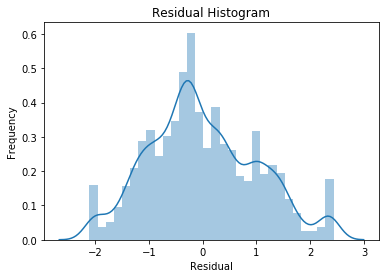

In [130]:
# Perform linear regression with the first N columns.
n = 6
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

Summary of your results!

***
#### Examine the results:
1. **Number of components before and after:**
    - Before = 16
    - After = 6
    
    Based on the p-value for each principal components when we perform linear regression with the all 16 columns, we can see that the first 6 principal components **(pc1-pc6)** yield pretty small p-value **(except pc3)**. The overall adjusted R-squared won't go above 0.44 eventhough we keep adding more principal components after 6.
2. **Adjusted R-squared = 0.044:** 4.4% of the variation in the output variable is explained by the input variables. However, as I already try with **n=16**, adding more variables won't improve our existing model. 
3. Based on the **Parkinson dataframe's columns**, the first five columns are **Jitter's related**, we can conclude that for  **Accurate Telemonitoring of Parkinson's Disease Progression by Noninvasive Speech Tests**, **Jitter** has more explanatory power compared with **Shimmer**.
***